In [2]:
import torchvision


In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


from random import shuffle

import torch

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T


In [4]:
data_path = "Computer Vision/train"

In [5]:
#dataset
os.listdir("Computer Vision/train")

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [6]:
data_paths = [(p,os.path.join(data_path,p)) for p in os.listdir(data_path)]

In [6]:
data_paths

[('cbb', 'Computer Vision/train\\cbb'),
 ('cbsd', 'Computer Vision/train\\cbsd'),
 ('cgm', 'Computer Vision/train\\cgm'),
 ('cmd', 'Computer Vision/train\\cmd'),
 ('healthy', 'Computer Vision/train\\healthy')]

In [7]:
#class distribution
count_dict = {a: len(os.listdir(b)) for a, b in data_paths}
count_dict

{'cbb': 466, 'cbsd': 1443, 'cgm': 773, 'cmd': 2658, 'healthy': 316}

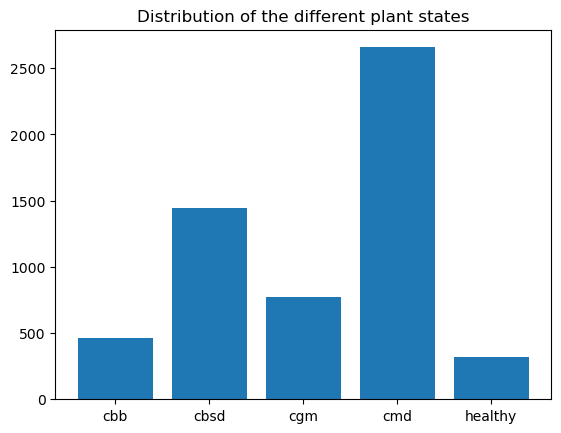

In [8]:
plt.bar(x = count_dict.keys(), height = count_dict.values())
plt.title("Distribution of the different plant states")
plt.show();plt.close("all")

In [9]:
sample_dir = data_paths[0]

In [10]:
sample_paths = [os.path.join(sample_dir[-1],f) for f in os.listdir(sample_dir[-1])]

In [11]:
image_sizes = []
image_shapes = []
for i in sample_paths:
    img = Image.open(i)
    img = np.array(img)
    
    image_sizes.append(img.size)
    image_shapes.append(img.shape)
set(image_sizes)
set(image_shapes)

{(500, 424, 3),
 (500, 476, 3),
 (500, 499, 3),
 (500, 500, 3),
 (500, 505, 3),
 (500, 506, 3),
 (500, 509, 3),
 (500, 510, 3),
 (500, 512, 3),
 (500, 517, 3),
 (500, 526, 3),
 (500, 545, 3),
 (500, 574, 3),
 (500, 596, 3),
 (500, 602, 3),
 (500, 613, 3),
 (500, 620, 3),
 (500, 624, 3),
 (500, 625, 3),
 (500, 666, 3),
 (500, 680, 3),
 (500, 681, 3),
 (500, 704, 3),
 (500, 723, 3),
 (500, 888, 3),
 (500, 959, 3),
 (521, 500, 3),
 (533, 500, 3),
 (575, 500, 3),
 (610, 500, 3),
 (664, 500, 3),
 (665, 500, 3),
 (666, 500, 3),
 (888, 500, 3),
 (1071, 500, 3)}

In [13]:
sample_files = [os.listdir(p[-1])[:4] for p in data_paths]

In [14]:
sample_files 

[['train-cbb-0.jpg',
  'train-cbb-1.jpg',
  'train-cbb-10.jpg',
  'train-cbb-100.jpg'],
 ['train-cbsd-0.jpg',
  'train-cbsd-1.jpg',
  'train-cbsd-10.jpg',
  'train-cbsd-100.jpg'],
 ['train-cgm-0.jpg',
  'train-cgm-1.jpg',
  'train-cgm-10.jpg',
  'train-cgm-100.jpg'],
 ['train-cmd-0.jpg',
  'train-cmd-1.jpg',
  'train-cmd-10.jpg',
  'train-cmd-100.jpg'],
 ['train-healthy-0.jpg',
  'train-healthy-1.jpg',
  'train-healthy-10.jpg',
  'train-healthy-100.jpg']]

In [21]:
sample_paths = list(map(lambda x, y: {x[0]: [os.path.join(x[1], y_) for y_ in y]}, data_paths, sample_files))
sample_paths

[{'cbb': ['Computer Vision/train\\cbb\\train-cbb-0.jpg',
   'Computer Vision/train\\cbb\\train-cbb-1.jpg',
   'Computer Vision/train\\cbb\\train-cbb-10.jpg',
   'Computer Vision/train\\cbb\\train-cbb-100.jpg']},
 {'cbsd': ['Computer Vision/train\\cbsd\\train-cbsd-0.jpg',
   'Computer Vision/train\\cbsd\\train-cbsd-1.jpg',
   'Computer Vision/train\\cbsd\\train-cbsd-10.jpg',
   'Computer Vision/train\\cbsd\\train-cbsd-100.jpg']},
 {'cgm': ['Computer Vision/train\\cgm\\train-cgm-0.jpg',
   'Computer Vision/train\\cgm\\train-cgm-1.jpg',
   'Computer Vision/train\\cgm\\train-cgm-10.jpg',
   'Computer Vision/train\\cgm\\train-cgm-100.jpg']},
 {'cmd': ['Computer Vision/train\\cmd\\train-cmd-0.jpg',
   'Computer Vision/train\\cmd\\train-cmd-1.jpg',
   'Computer Vision/train\\cmd\\train-cmd-10.jpg',
   'Computer Vision/train\\cmd\\train-cmd-100.jpg']},
 {'healthy': ['Computer Vision/train\\healthy\\train-healthy-0.jpg',
   'Computer Vision/train\\healthy\\train-healthy-1.jpg',
   'Computer Vis

In [22]:
samples = dict()

for (x, y), f in zip(data_paths, sample_files):
    samples[x] = [os.path.join(y, y_) for y_ in f]

In [23]:
samples

{'cbb': ['Computer Vision/train\\cbb\\train-cbb-0.jpg',
  'Computer Vision/train\\cbb\\train-cbb-1.jpg',
  'Computer Vision/train\\cbb\\train-cbb-10.jpg',
  'Computer Vision/train\\cbb\\train-cbb-100.jpg'],
 'cbsd': ['Computer Vision/train\\cbsd\\train-cbsd-0.jpg',
  'Computer Vision/train\\cbsd\\train-cbsd-1.jpg',
  'Computer Vision/train\\cbsd\\train-cbsd-10.jpg',
  'Computer Vision/train\\cbsd\\train-cbsd-100.jpg'],
 'cgm': ['Computer Vision/train\\cgm\\train-cgm-0.jpg',
  'Computer Vision/train\\cgm\\train-cgm-1.jpg',
  'Computer Vision/train\\cgm\\train-cgm-10.jpg',
  'Computer Vision/train\\cgm\\train-cgm-100.jpg'],
 'cmd': ['Computer Vision/train\\cmd\\train-cmd-0.jpg',
  'Computer Vision/train\\cmd\\train-cmd-1.jpg',
  'Computer Vision/train\\cmd\\train-cmd-10.jpg',
  'Computer Vision/train\\cmd\\train-cmd-100.jpg'],
 'healthy': ['Computer Vision/train\\healthy\\train-healthy-0.jpg',
  'Computer Vision/train\\healthy\\train-healthy-1.jpg',
  'Computer Vision/train\\healthy\\tra

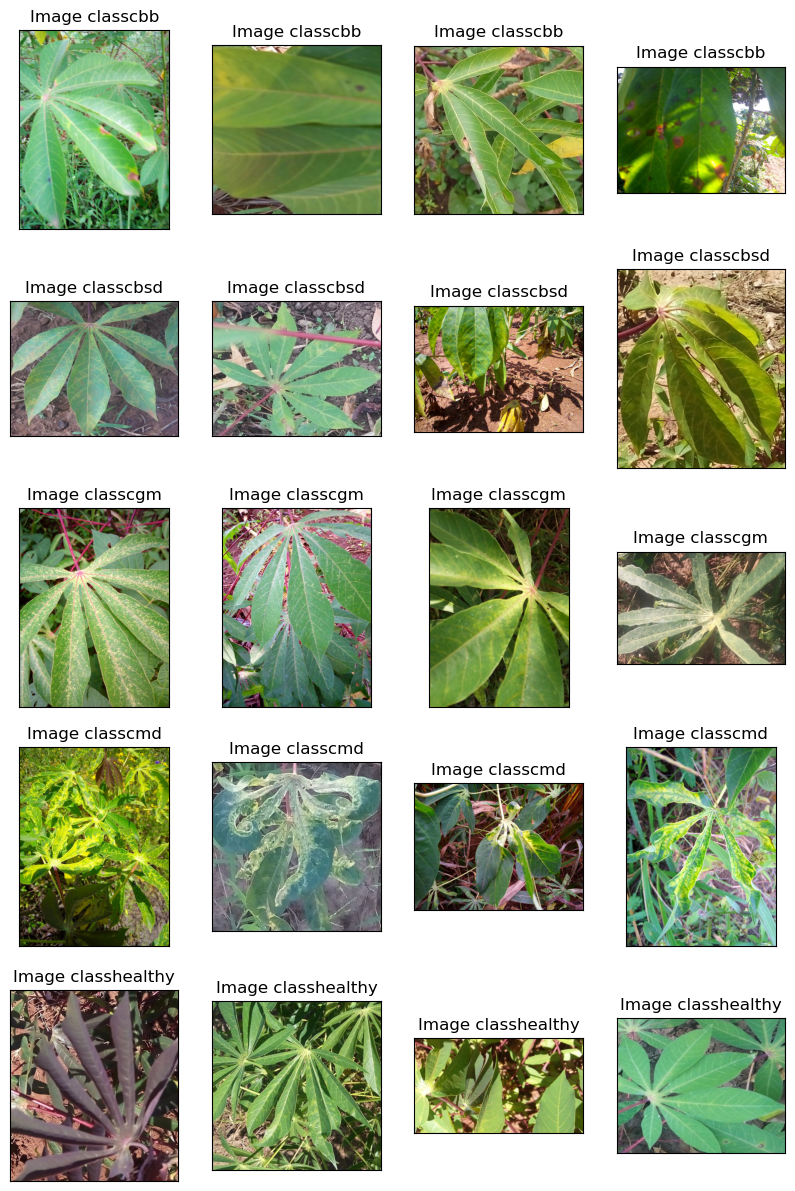

In [24]:
#visualizing
figs, axs= plt.subplots(len(samples), 4, figsize = (10,15))
i = 0
j = 0
for class_, images in samples.items():
    for img in images:
        img = Image.open(img)
        axs[i,j].imshow(img)
        axs[i,j].set_title("Image class" + class_)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
       
        j +=1
        
    j = 0
    i += 1
plt.show(); plt.close("all")
        
        

#### Observations

1. There are five categories of cassava images.

2. The images are generally large in size. This would imply that a lot of computation will take place.

4. The sizes of the images vary. This would require us to ensure that the images are of the same size.

5. The image classes are imbalanced. This might require the use of specialized metrics for evaluation, such as __ROC AUC__.

#### 2.3. Data Implications

Implied by our findings above, we can say the following:

1. ___Large size___: The images in the dataset are large in size.

2. ___Varying size___: Apart from magnitude in size, the images also vary in size.

3. __Label imbalance__: The images are not uniformly distributed with respect to their classes.

##### Data Preparation
- Standardized the sizes
- Label Imbalances

In [17]:
DEVICE = torch.device("cpu")

In [18]:
class CassavaDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        if transform is not None:
            self.transform = transform
        else:
            self.transform = T.Compose(
                [
                    T.Resize((224, 224)), # Resize images
                    T.ToTensor(), # Convert images to PyTorch tensors
                    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images
                ]
            )
        classes = os.listdir(path)
        self.class_map = dict(zip(classes, [_ for _ in range(len(classes))]))
        self.files = []

        for class_ in classes:
            self.files +=[(os.path.join(path, class_, f), class_) for f in os.listdir(os.path.join(path, class_))]

        shuffle(self.files)

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        file = self.files[ix]
        image = Image.open(file[0])

        return self.transform(image), self.class_map[file[-1]]